In [1]:
import pandas as pd

# Create DataFrame
data = {
    'study_hours': [5.0, 6.5, 4.0, 7.5, 3.0, 8.0, 2.5, 6.0, 5.5, 9.0, 4.5, 7.0, 3.5, 8.5, 5.0],
    'attendance': [90, 85, 70, 95, 60, 100, 55, 80, 75, 98, 65, 88, 50, 96, 78],
    'assignments_completed': [8,9,6,10,5,10,4,7,8,10,6,9,5,10,7],
    'score': [78,82,60,88,52,92,45,75,70,95,58,85,50,93,73]
}

df = pd.DataFrame(data)

# Save DataFrame to CSV file
df.to_csv('student_performance.csv', index=False)

print("CSV file saved from DataFrame!")


CSV file saved from DataFrame!


Dataset Preview:
    study_hours  attendance  assignments_completed  score
0          5.0          90                      8     78
1          6.5          85                      9     82
2          4.0          70                      6     60
3          7.5          95                     10     88
4          3.0          60                      5     52

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours            15 non-null     float64
 1   attendance             15 non-null     int64  
 2   assignments_completed  15 non-null     int64  
 3   score                  15 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 612.0 bytes
None

Missing Values:
 study_hours              0
attendance               0
assignments_completed    0
score                    0
dtype: int64

Linear Reg

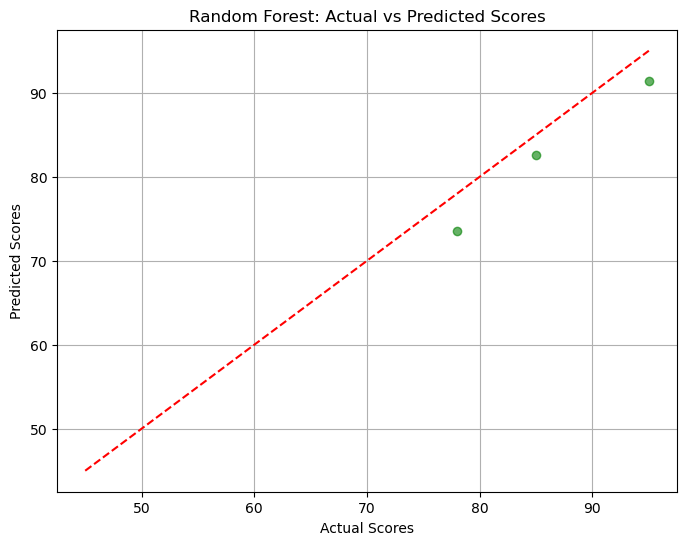

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
# If you have a CSV file (e.g., 'student_performance.csv'), use:
df = pd.read_csv('student_performance.csv')  # Replace with actual path

# 3. Display Basic Info
print("Dataset Preview:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# 4. Select Relevant Features
# Example columns in the dataset: 'study_hours', 'attendance', 'assignments_completed', 'score'
df = df[['study_hours', 'attendance', 'assignments_completed', 'score']]
df = df.dropna()  # Drop missing values for simplicity

# 5. Feature and Target Split
X = df[['study_hours', 'attendance', 'assignments_completed']]
y = df['score']

# 6. Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Define and Train Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 8. Evaluation Function
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")

# 9. Evaluate Models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

# 10. Plot Actual vs Predicted for Best Model (e.g., Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Random Forest: Actual vs Predicted Scores")
plt.grid(True)
plt.show()
